<a href="https://colab.research.google.com/github/DEALTOOR/SEMILLERO-IA-HITSS/blob/main/Diego_Alberto_Torres_Oropeza_Examen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Examen final

### Diego Alberto Torres Oropeza
17/10/2025
---

# Bibliotecas

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import  cross_validate, RepeatedStratifiedKFold
from sklearn.metrics import classification_report, make_scorer
from imblearn.metrics import geometric_mean_score, classification_report_imbalanced

# Ejercicio 1. Leer y renombrar columnas

In [27]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"

data = pd.read_csv(url, delim_whitespace=True, header=None)

data

/tmp/ipython-input-1743704864.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(url, delim_whitespace=True, header=None)


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


### Renombramos las columnas según la página de UCI

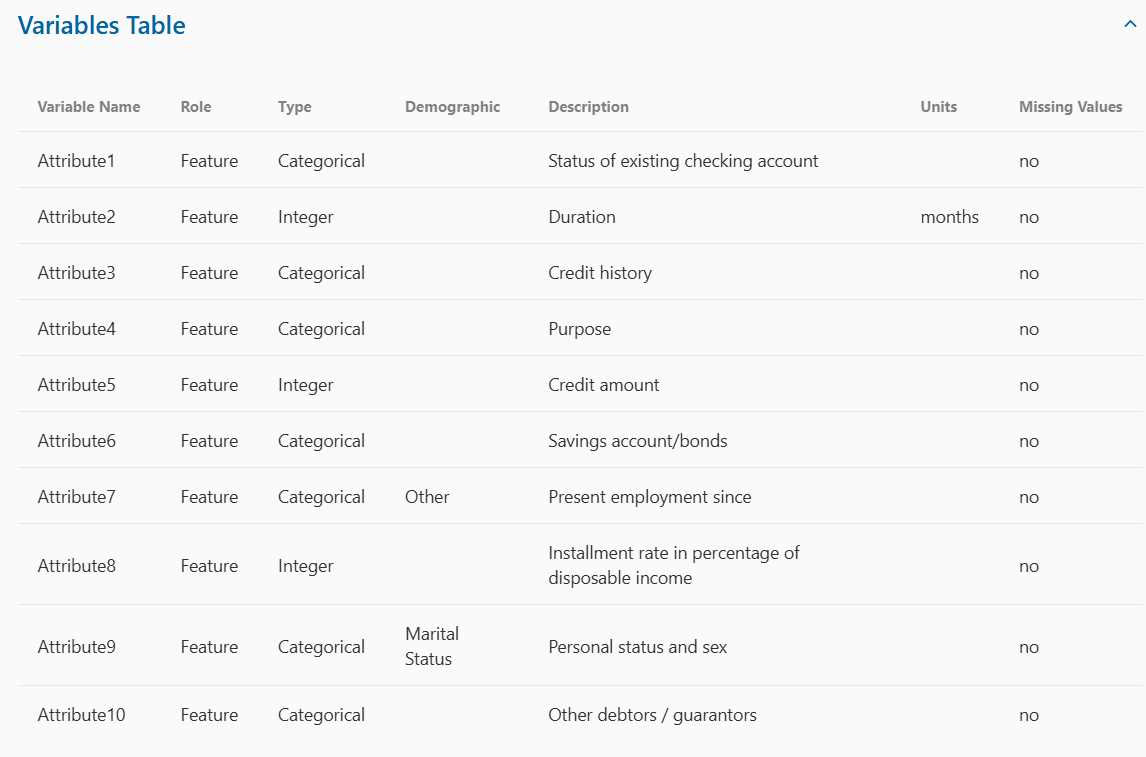

In [28]:
cols = [
    "status",
    "duration",
    "credit_history",
    "purpose",
    "amount",
    "savings",
    "employment_duration",
    "installment_rate",
    "personal_status_sex",
    "other_debtors",
    "present_residence",
    "property",
    "age",
    "other_installment_plans",
    "housing",
    "number_credits",
    "job",
    "people_liable",
    "telephone",
    "foreign_worker",
    "credit_risk"
]

data.columns = cols
data.head()


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [29]:
# Verificar el cambio
data["credit_risk"].value_counts()

,count
credit_risk,
1,700
2,300


### Ejercicio 2. Partición de datos 85/15

In [36]:
# Separar variables predictoras y variable objetivo
X = data.drop("credit_risk", axis=1)
y = data["credit_risk"]

# Dividir el dataset: 85% train, 15% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42, stratify=y
)

# Verificar tamaños
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

# Revisar balance de clases
print("\nDistribución en entrenamiento:")
print(y_train.value_counts(normalize=True))
print("\nDistribución en prueba:")
print(y_test.value_counts(normalize=True))

Tamaño del conjunto de entrenamiento: (850, 20)
Tamaño del conjunto de prueba: (150, 20)

Distribución en entrenamiento:
credit_risk
1    0.7
2    0.3
Name: proportion, dtype: float64

Distribución en prueba:
credit_risk
1    0.7
2    0.3
Name: proportion, dtype: float64


### Ejercicio 3. Pipeline con tranformaciones de datos

Según la página, las variables están divididas así, por tipo de valores:

- Quantitative (numéricas)

  - duration_months, credit_amount, installment_rate_pct_income, present_residence_since, age, num_existing_credits, num_people_liable

- Categorical (categóricas nominales)

  - status_checking_account, credit_history, purpose, personal_status_sex, other_debtors, property, other_installment_plans, housing, telephone, foreign_worker

- Ordinal (discretized quantitative)

  - savings, present_employment, job



credit_risk es nuestra variable objetivo.

### Imputación y transformaciones

- Imputación

  - Numéricas: SimpleImputer(strategy="median"). Para tratar outliers y es apropiada para variables que representan cantidades.

  - Categóricas: SimpleImputer(strategy="most_frequent"). Vamos a rellenar con la moda para preservar la categoría mayoritaria.

  - Ordinal: SimpleImputer(strategy="most_frequent"). De momento no las tocamos, como dice el ejercicio.

- Escalado

  - Numéricas → MinMaxScaler(). Deja las variables en un rango de [0, 1]

- Codificación

  - Categóricas y binarias → OneHotEncoder(handle_unknown="ignore"). Aunque las variabbles binarias podrían mapearse a 0/1 directamente, en el archivo están codificadas como etiquetas (p. ej. A191, A192), por lo que aplicar OneHotEncoder las transforma de forma segura a representación numérica sin introducir orden implícito. Además, con OneHotEncoder evitamos suponer una relación ordinal entre categorías.

  ### Mapeo de variables según la página

  Vamos a mapear los valores de cada registro según la página, esto para que sea más fácil de entender y trabajar todo:

In [31]:
df = data.copy()

# 1. Diccionarios de decodificación
map_status = {
    "A11": "< 0 DM",
    "A12": "0 <= ... < 200 DM",
    "A13": ">= 200 DM / salary assignment ≥ 1 year",
    "A14": "no checking account"
}

map_credit_history = {
    "A30": "no credits taken / all credits paid back duly",
    "A31": "all credits at this bank paid back duly",
    "A32": "existing credits paid back duly till now",
    "A33": "delay in paying off in the past",
    "A34": "critical account / other credits existing (not at this bank)"
}

map_purpose = {
    "A40": "car (new)",
    "A41": "car (used)",
    "A42": "furniture/equipment",
    "A43": "radio/television",
    "A44": "domestic appliances",
    "A45": "repairs",
    "A46": "education",
    "A47": "vacation",
    "A48": "retraining",
    "A49": "business",
    "A410": "others"
}

map_savings = {
    "A61": "< 100 DM",
    "A62": "100 <= ... < 500 DM",
    "A63": "500 <= ... < 1000 DM",
    "A64": ">= 1000 DM",
    "A65": "unknown / no savings account"
}

map_employment_duration = {
    "A71": "unemployed",
    "A72": "< 1 year",
    "A73": "1 <= ... < 4 years",
    "A74": "4 <= ... < 7 years",
    "A75": ">= 7 years"
}

map_personal_status_sex = {
    "A91": "male: divorced/separated",
    "A92": "female: divorced/separated/married",
    "A93": "male: single",
    "A94": "male: married/widowed",
    "A95": "female: single"
}

map_other_debtors = {
    "A101": "none",
    "A102": "co-applicant",
    "A103": "guarantor"
}

map_property = {
    "A121": "real estate",
    "A122": "building society savings / life insurance",
    "A123": "car or other (not in savings)",
    "A124": "unknown / no property"
}

map_other_installment_plans = {
    "A141": "bank",
    "A142": "stores",
    "A143": "none"
}

map_housing = {
    "A151": "rent",
    "A152": "own",
    "A153": "for free"
}

map_job = {
    "A171": "unemployed / unskilled (non-resident)",
    "A172": "unskilled (resident)",
    "A173": "skilled employee / official",
    "A174": "management / self-employed / highly qualified / officer"
}

map_telephone = {
    "A191": "none",
    "A192": "yes (registered)"
}

map_foreign_worker = {
    "A201": "yes",
    "A202": "no"
}

# 2. Aplicar los mapeos al DataFrame
df["status"] = df["status"].map(map_status)
df["credit_history"] = df["credit_history"].map(map_credit_history)
df["purpose"] = df["purpose"].map(map_purpose)
df["savings"] = df["savings"].map(map_savings)
df["employment_duration"] = df["employment_duration"].map(map_employment_duration)
df["personal_status_sex"] = df["personal_status_sex"].map(map_personal_status_sex)
df["other_debtors"] = df["other_debtors"].map(map_other_debtors)
df["property"] = df["property"].map(map_property)
df["other_installment_plans"] = df["other_installment_plans"].map(map_other_installment_plans)
df["housing"] = df["housing"].map(map_housing)
df["job"] = df["job"].map(map_job)
df["telephone"] = df["telephone"].map(map_telephone)
df["foreign_worker"] = df["foreign_worker"].map(map_foreign_worker)
df

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,< 0 DM,6,critical account / other credits existing (not...,radio/television,1169,unknown / no savings account,>= 7 years,4,male: single,none,...,real estate,67,none,own,2,skilled employee / official,1,yes (registered),yes,1
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,radio/television,5951,< 100 DM,1 <= ... < 4 years,2,female: divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee / official,1,none,yes,2
2,no checking account,12,critical account / other credits existing (not...,education,2096,< 100 DM,4 <= ... < 7 years,2,male: single,none,...,real estate,49,none,own,1,unskilled (resident),2,none,yes,1
3,< 0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,< 100 DM,4 <= ... < 7 years,2,male: single,guarantor,...,building society savings / life insurance,45,none,for free,1,skilled employee / official,2,none,yes,1
4,< 0 DM,24,delay in paying off in the past,car (new),4870,< 100 DM,1 <= ... < 4 years,3,male: single,none,...,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,12,existing credits paid back duly till now,furniture/equipment,1736,< 100 DM,4 <= ... < 7 years,3,female: divorced/separated/married,none,...,real estate,31,none,own,1,unskilled (resident),1,none,yes,1
996,< 0 DM,30,existing credits paid back duly till now,car (used),3857,< 100 DM,1 <= ... < 4 years,4,male: divorced/separated,none,...,building society savings / life insurance,40,none,own,1,management / self-employed / highly qualified ...,1,yes (registered),yes,1
997,no checking account,12,existing credits paid back duly till now,radio/television,804,< 100 DM,>= 7 years,4,male: single,none,...,car or other (not in savings),38,none,own,1,skilled employee / official,1,none,yes,1
998,< 0 DM,45,existing credits paid back duly till now,radio/television,1845,< 100 DM,1 <= ... < 4 years,4,male: single,none,...,unknown / no property,23,none,for free,1,skilled employee / official,1,yes (registered),yes,2


In [32]:
# Vemos si hay nulos (no hubieron)
print(df.isnull().sum())

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64


In [33]:
df['credit_risk'] = df['credit_risk'].map({1: 0, 2: 1}) #Pasar a numero binario

In [34]:
#Vemos los tipos de dato de cada columna
print(df.dtypes)

status                     object
duration                    int64
credit_history             object
purpose                    object
amount                      int64
savings                    object
employment_duration        object
installment_rate            int64
personal_status_sex        object
other_debtors              object
present_residence           int64
property                   object
age                         int64
other_installment_plans    object
housing                    object
number_credits              int64
job                        object
people_liable               int64
telephone                  object
foreign_worker             object
credit_risk                 int64
dtype: object


In [37]:
numeric_pipeline = Pipeline([
    ('scaler', MinMaxScaler())
])

categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

binary_pipeline = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary'))
])
categorical_vars = X.columns[X.dtypes == 'object'].tolist()

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_pipeline, ['duration','amount','age']),
    ('cat', categorical_pipeline, categorical_vars)
])

### Ejercicio 4. Implementamos el modelo de Regresión Logística

In [38]:
# Definimos las funciones de accuracy, precision, recall, f1 score y Gmean.
def mi_accuracy(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return (tp + tn) / (tp + tn + fp + fn)
def mi_precision(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tp / (tp + fp)
def mi_recall(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tp / (tp + fn)
def mi_f1(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    precision = mi_precision(y_true, y_pred)
    recall = mi_recall(y_true, y_pred)
    return 2 * (precision * recall) / (precision + recall)
def mi_gmean(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    recall = mi_recall(y_true, y_pred)
    return np.sqrt(recall * (tn / (tn + fp)))

In [43]:
# Aplicamos la validación cruzada
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

In [44]:
train_results = []
val_results = []
recall_scores = []

In [47]:
model = LogisticRegression(class_weight='balanced', max_iter=1000)
pipe = make_pipeline(preprocessor, model)

mismetricas = {
      'accuracy':make_scorer(mi_accuracy),
      'recall': make_scorer(mi_recall),
      'gmean': make_scorer(mi_gmean),
      'precision': make_scorer(mi_precision),
      'f1': make_scorer(mi_f1)
  }

resultadosOU = cross_validate(pipe, X, y, cv=kfold, scoring=mismetricas)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_scorer.py", line 140, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_scorer.py", line 388, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/tmp/ipython-input-391716824.py", line 3, in mi_accuracy
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
                     ^^^^^^^^^^^^^^^^
NameError: name 'confusion_matrix' is not defined

  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on thi

fit_time: 0.04286913871765137


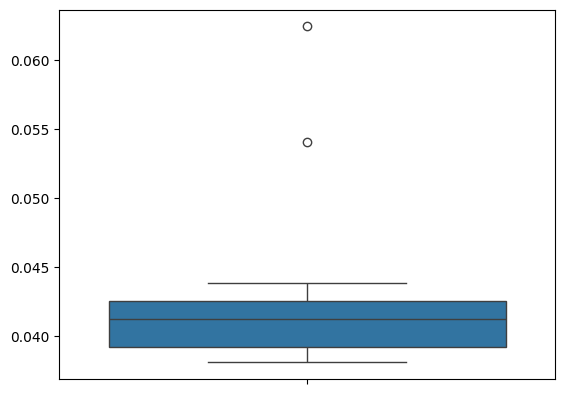

score_time: 0.08601339658101399


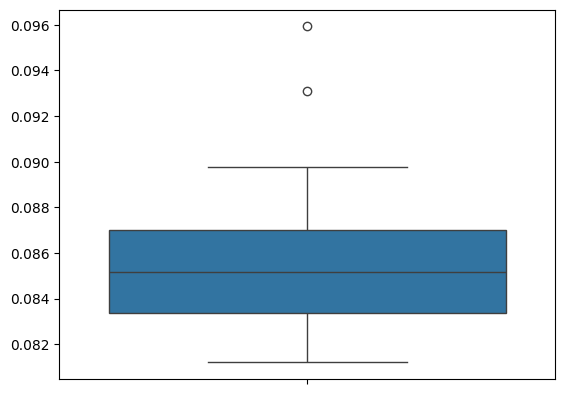

test_accuracy: nan


ValueError: List of boxplot statistics and `positions` values must have same the length

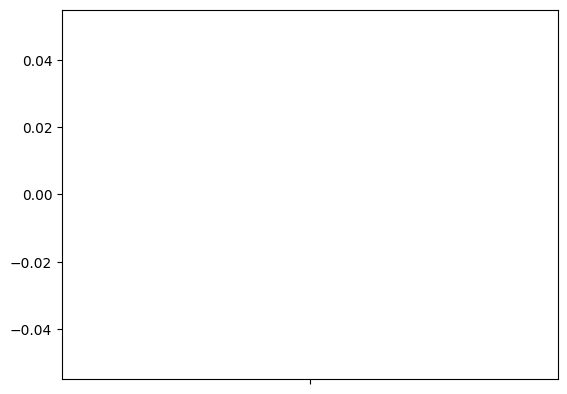

In [50]:
for var, contexto in resultadosOU.items():
    print(f"{var}: {contexto.mean()}")
    ax = sns.boxplot(data=contexto, showmeans=False)
    plt.show()
